## Step 1: Import Libraries
### Importing necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Setting plot style for better visualizations
plt.style.use('seaborn-darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [3]:
data= pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data Processing 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# let's covert dteday to date time format to make it easier to work with time-based features 

data["dteday"]= pd.to_datetime(data["dteday"])
print("missing values:\n", data.isnull().sum())

missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- we will drop the 'instant' feature as it is just the serial number for the dataset and it doesn't hold useful information 

In [18]:
data= data.drop(columns=['instant'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


### Converting Features (which are needed) into Categorical Variable 

- We map season, weathersit, holiday, month, weekday, workingday and yr columns to descriptive labels to improve readability and then convert them to categorical types.

In [29]:
print(data.isna().sum())

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [20]:
print(data['season'].unique())


[1 2 3 4]


In [21]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['season'] = data['season'].astype('category')



In [22]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
# Convert 'yr' to categorical (0 for 2018, 1 for 2019)

data['yr'] = data['yr'].map({0: '2018', 1: '2019'}).astype('category')


In [24]:
# Convert 'mnth' to categorical with month names

data['mnth'] = data['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
    6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
    11: 'November', 12: 'December'
}).astype('category')

In [25]:
# Convert 'holiday' to categorical (0: 'No', 1: 'Yes')

data['holiday'] = data['holiday'].map({0: 'No', 1: 'Yes'}).astype('category')

In [26]:
# Convert 'weekday' to categorical with day names

data['weekday'] = data['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
    5: 'Friday', 6: 'Saturday'
}).astype('category')

In [27]:
# Convert 'workingday' to categorical (0: 'No', 1: 'Yes')

data['workingday'] = data['workingday'].map({0: 'No', 1: 'Yes'}).astype('category')

In [28]:

# Convert 'weathersit' to categorical with descriptive names

data['weathersit'] = data['weathersit'].map({
    1: 'Clear', 
    2: 'Mist/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
}).astype('category')

# Display the head of the data to confirm the changes
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,January,No,Saturday,No,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,January,No,Sunday,No,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Exploratory Data Analysis (EDA)


In [32]:
# Visualization of Data Statistics 
data.describe().T.style.background_gradient(cmap = 'coolwarm',axis=1).set_precision(2)


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_5464\3478145874.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.describe().T.style.background_gradient(cmap = 'coolwarm',axis=1).set_precision(2)


,count,mean,std,min,25%,50%,75%,max
temp,730.00,20.32,7.51,2.42,13.81,20.47,26.88,35.33
atemp,730.00,23.73,8.15,3.95,16.89,24.37,30.45,42.04
hum,730.00,62.77,14.24,0.00,52.00,62.62,72.99,97.25
windspeed,730.00,12.76,5.20,1.50,9.04,12.13,15.63,34.00
casual,730.00,849.25,686.48,2.00,316.25,717.00,1096.50,3410.00
registered,730.00,3658.76,1559.76,20.00,2502.25,3664.50,4783.25,6946.00
cnt,730.00,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00


Observation from above feature description 
- some of the Columns may have outliers like 'casual'
- Data are not uniform across all the features hence it need to be Scaled so that the Interpreation can be done well


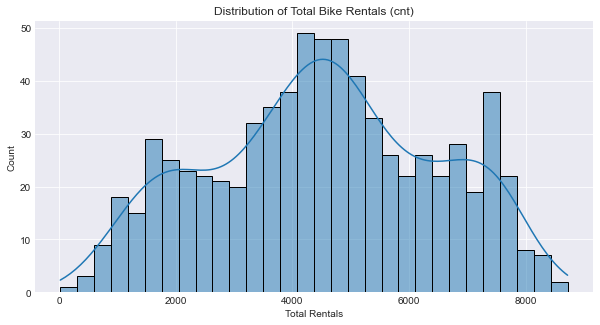

In [30]:
# Plotting distribution of 'cnt' to understand target variable

plt.figure(figsize=(10, 5))
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.show()

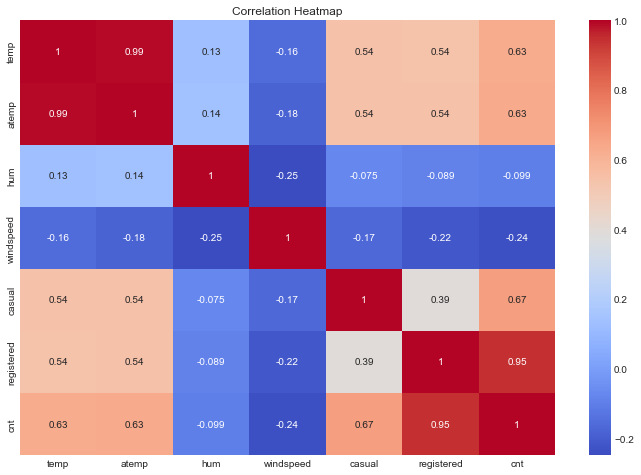

In [31]:
# Visualizing the correlation between variables

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Registered Bike users are more than Casual and is strongly correlated with Target Variable
- Humidity has not much Negative effect on the Target Variable.
- Since after a user rented a Bike only we can determine He or She has registered or Casually done so both the Features are actually Target Feature Since we have already a Target Feature we can drop these two.
- Temp and atemp are very strongly correlated one can be dropped


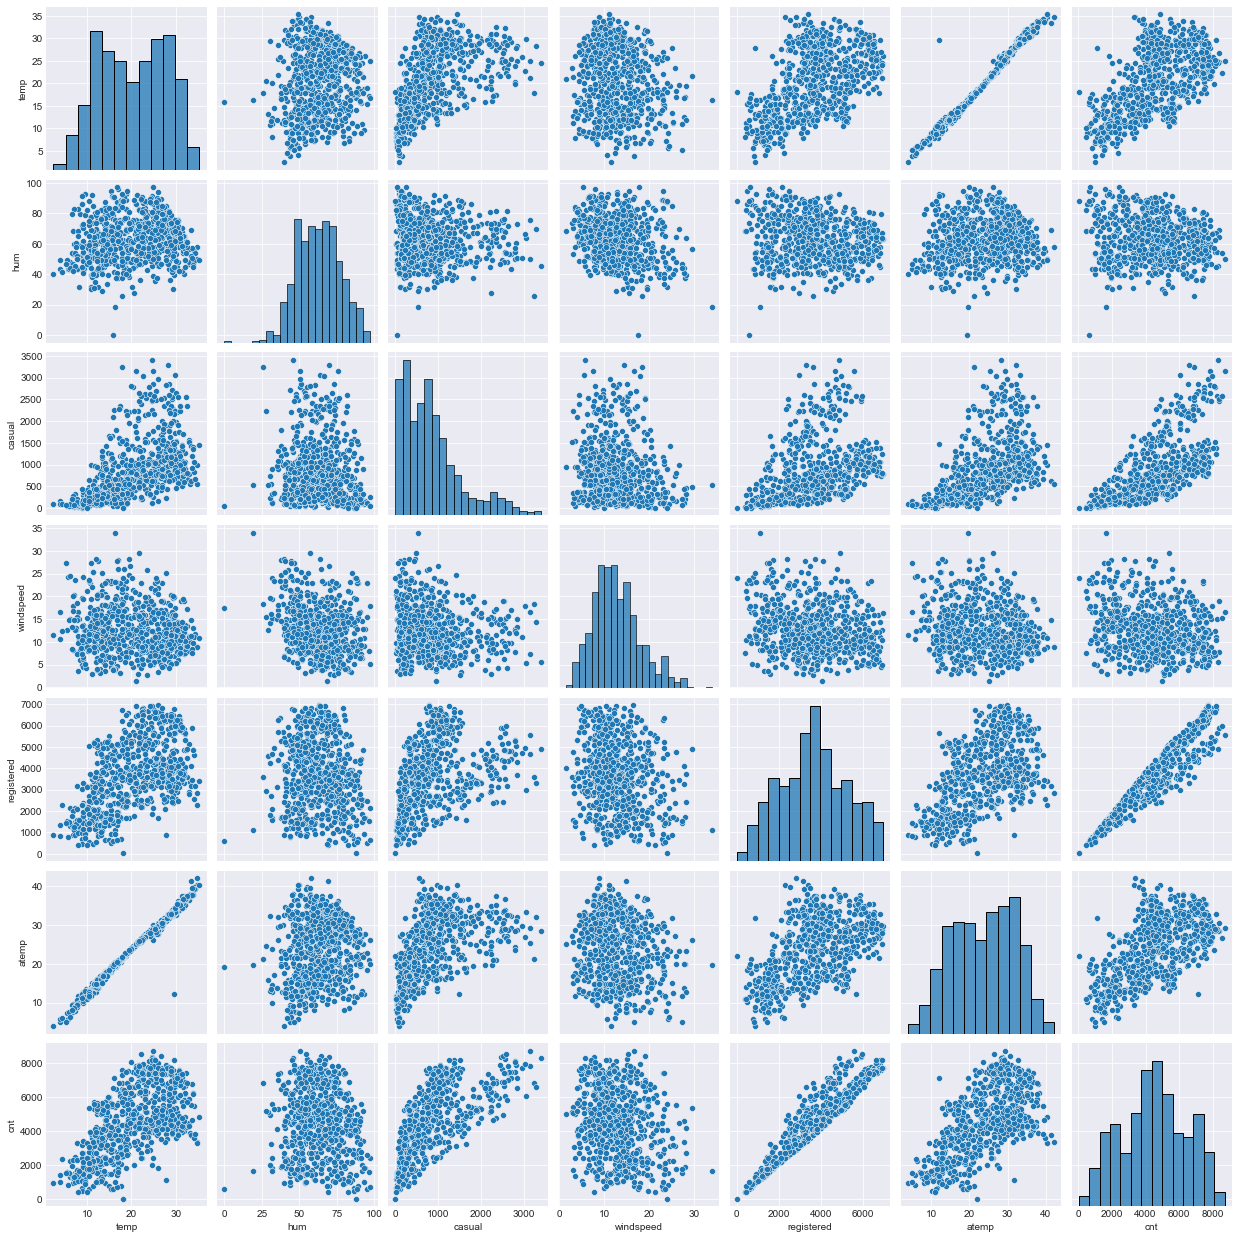

In [39]:
#visualizing the numeric variables of the dataset using pairplot 

sns.pairplot(data, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

In [36]:
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
# Creating dummy variables for categorical columns
data = pd.get_dummies(data, columns=['season', 'weathersit', 'yr'], drop_first=True)

In [40]:
# Scale the continuous features
scaler = StandardScaler()
data[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(data[['temp', 'atemp', 'hum', 'windspeed']])

# Splitting the data into features and target
X = data.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y = data['cnt']

## Train-test split

### Splitting the data into training and test sets


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Test set shape (target):", y_test.shape)


Training set size: (511, 11)
Test set size: (219, 11)
Training set shape (target): (511,)
Test set shape (target): (219,)


### Feature Scaling and Model Building

- feature scaling helps by standardizing the ranges of numeric features, especially when features like temperature, humidity, and wind speed vary widely.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[['temp', 'atemp', 'hum', 'windspeed']])

X_test_scaled = scaler.transform(X_test[['temp', 'atemp', 'hum', 'windspeed']])

# Replace the original columns with the scaled ones in both training and testing sets
X_train[['temp', 'atemp', 'hum', 'windspeed']] = X_train_scaled
X_test[['temp', 'atemp', 'hum', 'windspeed']] = X_test_scaled

print("Feature scaling applied on temp, atemp, hum, and windspeed.")


Feature scaling applied on temp, atemp, hum, and windspeed.


## Model Training: Linear Regression

###  One-Hot Encoding for Categorical Variables

-  some of the categorical variables are still in string format. Linear regression requires numerical data, so we need to encode categorical features before training the model.
- To resolve this, let’s convert the categorical variables (season, mnth, weekday, weathersit) into dummy variables

In [47]:
# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

# Check the new shape after encoding
print("Training set shape after one-hot encoding:", X_train.shape)
print("Test set shape after one-hot encoding:", X_test.shape)


Training set shape after one-hot encoding: (511, 29)
Test set shape after one-hot encoding: (219, 29)


In [49]:
# Check data types in X_train to identify any remaining non-numeric columns
print("Data types in X_train before further encoding:\n", X_train.dtypes)

# If there are any categorical columns left with string values, apply one-hot encoding
# Convert any remaining categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure X_train and X_test have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check the data types after encoding
print("Data types in X_train after encoding:\n", X_train.dtypes)


Data types in X_train before further encoding:
 yr                            category
holiday                       category
workingday                    category
temp                           float64
atemp                          float64
hum                            float64
windspeed                      float64
season_spring                    uint8
season_summer                    uint8
season_winter                    uint8
mnth_August                      uint8
mnth_December                    uint8
mnth_February                    uint8
mnth_January                     uint8
mnth_July                        uint8
mnth_June                        uint8
mnth_March                       uint8
mnth_May                         uint8
mnth_November                    uint8
mnth_October                     uint8
mnth_September                   uint8
weekday_Monday                   uint8
weekday_Saturday                 uint8
weekday_Sunday                   uint8
weekday_Thursday

In [50]:
# Convert categorical columns 'yr', 'holiday', and 'workingday' to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure X_train and X_test align to have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Recheck the data types after encoding to confirm they're now numeric
print("Data types in X_train after encoding:\n", X_train.dtypes)


Data types in X_train after encoding:
 temp                          float64
atemp                         float64
hum                           float64
windspeed                     float64
season_spring                   uint8
season_summer                   uint8
season_winter                   uint8
mnth_August                     uint8
mnth_December                   uint8
mnth_February                   uint8
mnth_January                    uint8
mnth_July                       uint8
mnth_June                       uint8
mnth_March                      uint8
mnth_May                        uint8
mnth_November                   uint8
mnth_October                    uint8
mnth_September                  uint8
weekday_Monday                  uint8
weekday_Saturday                uint8
weekday_Sunday                  uint8
weekday_Thursday                uint8
weekday_Tuesday                 uint8
weekday_Wednesday               uint8
weathersit_Light Snow/Rain      uint8
weathersit_

In [51]:
# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Display a sample of predictions
print("Sample predictions on the training set:", y_train_pred[:5])
print("Sample predictions on the testing set:", y_test_pred[:5])


Sample predictions on the training set: [6608.15875369 6325.25520378 4549.23065887 2950.78961722 5403.9876959 ]
Sample predictions on the testing set: [3432.46629323 7785.34462146 3727.50657594 5376.05948555 5172.48574697]


## Evaluate Model Performance


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R²:", r2_train)

print("\nTesting Set Performance:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R²:", r2_test)


Training Set Performance:
MAE: 545.5536567474513
MSE: 560426.7162340712
RMSE: 748.6165348388126
R²: 0.8528429664095881

Testing Set Performance:
MAE: 582.6214489084034
MSE: 616070.025994618
RMSE: 784.9012842355514
R²: 0.8283138102633683


- The high R sqauare values for both the training and testing sets indicate a strong fit. The model is capturing most of the relationship between the predictors and bike demand (cnt)
- MAE: The mean absolute error tells us the model’s average prediction error, which is around 546 for training and 583 for testing.

## Analyze Feature Significance
- we will analyze which features had the most impact on the bike demand

In [53]:
# Pair feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value of coefficients to see most impactful features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
print("Top features based on their impact:\n", feature_importance[['Feature', 'Coefficient']])


Top features based on their impact:
                        Feature  Coefficient
24  weathersit_Light Snow/Rain -2221.569061
26                     yr_2019  2025.117727
6                season_winter   929.300225
17              mnth_September   757.996583
0                         temp   756.624802
10                mnth_January  -547.525713
25      weathersit_Mist/Cloudy  -519.674102
27                 holiday_Yes  -433.450516
4                season_spring  -395.058092
8                mnth_December  -382.118963
5                season_summer   368.439834
15               mnth_November  -344.040511
28              workingday_Yes   308.533715
19            weekday_Saturday   298.574841
11                   mnth_July  -281.456439
9                mnth_February  -281.201903
3                    windspeed  -270.725396
14                    mnth_May   224.246901
7                  mnth_August   196.657575
2                          hum  -193.692160
18              weekday_Monday  -189.01

### breakdown of what the coefficients indicate for feature impact on bike rental counts:

1. High-Impact Features:

- Weather Conditions (Light Snow/Rain, Mist/Cloudy): A significant negative impact on demand, especially for Light Snow/Rain, which causes a major reduction in rentals
- Year (2019): A strong positive coefficient suggests that rentals were substantially higher in 2019 than in 2018
- Seasonal Influence: Winter positively impacts rentals, potentially due to favorable weather conditions for biking. In contrast, spring sees a decrease, possibly due to unstable weather
- Temperature (temp): Higher temperatures positively influence demand, as people might find biking more enjoyable in warmer weather

## Residual analysis

In [54]:
# Calculate residuals
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

Text(0, 0.5, 'Residuals')

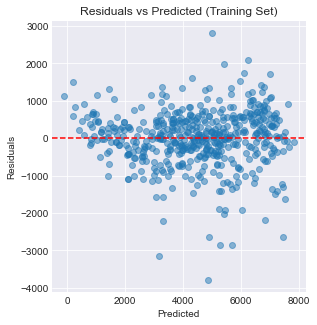

In [55]:
# 1. Scatter Plot: Predicted vs Residuals for Training Set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

- We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.

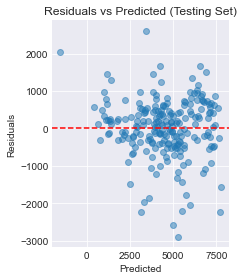

In [58]:
# Scatter Plot: Predicted vs Residuals for Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

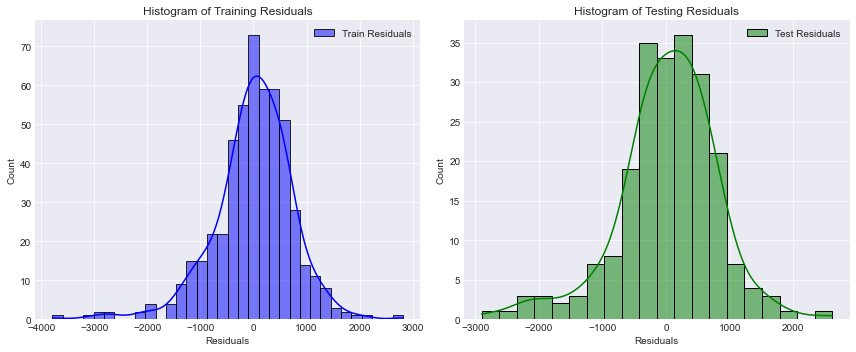

In [59]:
# 2. Histogram: Residual Distribution

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals')
plt.title('Histogram of Training Residuals')
plt.xlabel('Residuals')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color='green', label='Test Residuals')
plt.title('Histogram of Testing Residuals')
plt.xlabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

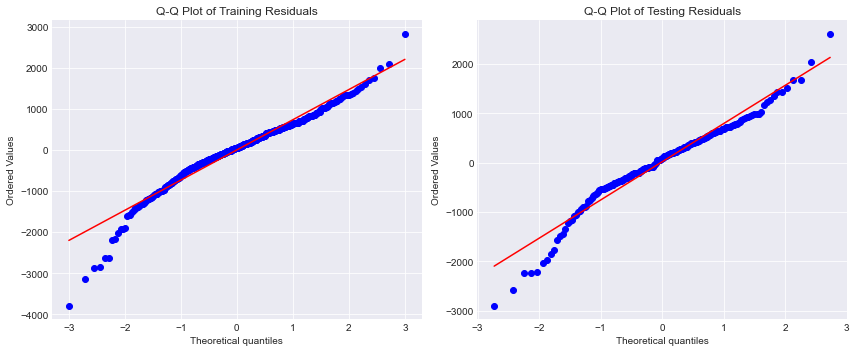

Mean of Training Residuals: -2.082404698775589e-13
Mean of Testing Residuals: 19.807846366067146


In [60]:
# 3. Q-Q Plot for Normality Check
import scipy.stats as stats

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Training Residuals")

plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Testing Residuals")
plt.tight_layout()
plt.show()

# Optional summary of residuals
print("Mean of Training Residuals:", np.mean(train_residuals))
print("Mean of Testing Residuals:", np.mean(test_residuals))

### Looking for Constant Variance


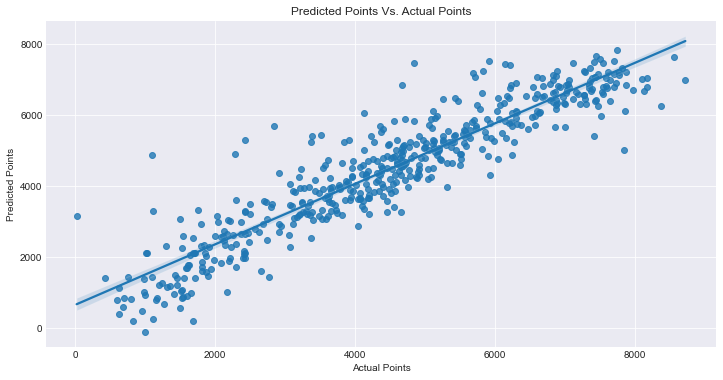

In [61]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

- We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

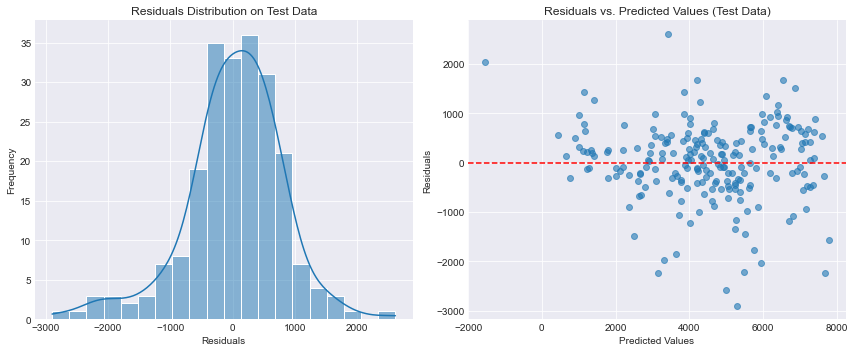

Test Set Evaluation Metrics:
Mean Absolute Error (MAE): 582.6214489084034
Mean Squared Error (MSE): 616070.025994618
Root Mean Squared Error (RMSE): 784.9012842355514
R-squared (R²): 0.8283138102633683


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

test_residuals = y_test - y_test_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(test_residuals, kde=True)
plt.title("Residuals Distribution on Test Data")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values (Test Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"R-squared (R²): {test_r2}")


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8283138102633683

### INSIGHTS 

- Temperature is the Most Significant Feature which affects the Business positively,
Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.

- Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

- The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

- It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days

- Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.